# **IPL Match Analysis**

### **Project Objective**


The main goal of this project is to use Exploratory Data Analysis (EDA) to understand the IPL data better.

The objectives are:

- To clean and prepare the IPL dataset for analysis.

- To study how teams perform in different seasons.

- To find which players and teams are most successful.

- To check if the toss decision affects the match result.

- To see which stadiums host the most matches and wins.


# Business problem
The business problem is to analyze this historical IPL data to extract actionable insights that can help stakeholders such as teams, coaches, broadcasters, and analysts make better decisions.


# **Target Audience**
- Cricket Organizers and Broadcasters

- Team Coaches and Strategists

- Sports Analysts and Commentators

- Cricket Fans and Enthusiasts

- Data Science Learners and Students

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
# pd.read_csv is use for reading the file
df = pd.read_csv("/content/matches.csv")
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


### **Data Description**
- id  ------------------------>  Unique match ID number.
- season ------------------->  The IPL season or year in which the match was played.
- date ----------------------> The date on which the match was played.
- team1 ---------------------> The first team that played the match


- team2---------------------->	The second team that played the match.

- toss_winner----------------> The team that won the toss.

- toss_decision	--------------> What the toss-winning team decided to do (bat or field).

- result-----------------------> The result of the match — for example, “normal,” “tie,” or “no result.”


- winner---------------------->	The team that won the match.

- win_by_runs----------------->	If the team batting first won, this shows by how many runs they won.

- win_by_wickets-------------->	If the team batting second won, this shows by how many wickets they won.

- player_of_match------------->	The player who was awarded “Player of the Match.

- venue------------------------> The name of the stadium where the match took place.

- umpire1, umpire2,-------------->	Names of the umpires officiating the match.

- super_over--------------------->	Indicates whether a super over was played (Yes/No).

- result_margin------------------>	The margin by which a team won (number of runs or wickets).






 # **EDA Workflow**
 - The EDA (Exploratory Data Analysis) process helps us understand the data better, clean it, and find useful insights.

- Data Collection :– Imported the IPL dataset (matches.csv) using Pandas and checked its structure.

- Data Cleaning :– Handled missing values in columns like city, winner, player_of_match, and result_margin, and removed duplicates.

- Data Exploration :– Used summary statistics and value counts to understand patterns like top teams, players, and venues.

- Data Visualization :– Created charts using Matplotlib and Seaborn to show trends such as most wins, cities hosting matches, and toss results.


- Insights & Conclusion :– Found key patterns, like teams winning more while chasing and top-performing players and venues.

In [45]:
# .Info give information about the data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [46]:
# .shape give info about size of data set how many columns in the data and rows
df.shape

(1095, 20)

In [47]:
#how many seasons
df['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [48]:
# for checking null values
df.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [49]:
df[["team1", "team2"]]

,team1,team2
0,Royal Challengers Bangalore,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals
3,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers
...,...,...
1090,Punjab Kings,Sunrisers Hyderabad
1091,Sunrisers Hyderabad,Kolkata Knight Riders
1092,Royal Challengers Bengaluru,Rajasthan Royals
1093,Sunrisers Hyderabad,Rajasthan Royals


In [50]:
#checking unique values
df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [51]:
df['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [52]:
df["winner"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [53]:
#filling null values in city column

In [54]:
df['player_of_match'].fillna('Match Cancel', inplace=True) # matchcancell


In [55]:
df["winner"].fillna("Match cancel", inplace=True) # match cancel

In [56]:
df["result_margin"].fillna(0, inplace=True)

In [57]:
df["target_runs"].fillna(0, inplace=True)

In [58]:
df["target_overs"].fillna(0, inplace=True)

In [59]:
df["method"].fillna("Normal" , inplace=True)

In [60]:
df['city'].fillna('unknown',inplace=True)

In [61]:
df.drop(["season"], axis=1, inplace=True)

In [62]:
# changing name
df['team1'] = df['team1'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',


})
df['team1'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Lucknow Super Giants',
       'Gujarat Titans'], dtype=object)

In [63]:
# changing name
df['team2'] = df['team2'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
})
df['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers', 'Punjab Kings',
       'Delhi Capitals', 'Mumbai Indians', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [64]:
# changing name
df['toss_winner'] = df['toss_winner'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
})
df['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Punjab Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [65]:
# changing name
df['winner'] = df['winner'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
})
df['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals', 'Punjab Kings',
       'Deccan Chargers', 'Mumbai Indians', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Match cancel', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [66]:
#changing data type of date columnn
df['date'] = pd.to_datetime(df['date'])

In [67]:
#creating new columns season
df['season'] = df['date'].dt.year

In [68]:
df.isnull().sum()

,0
id,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0
toss_decision,0


In [69]:
df.head()

,id,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,Normal,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Normal,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,Normal,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,Normal,BF Bowden,K Hariharan,2008


# Which team has won the most matches in IPL history?

In [70]:
# which team won most matches
df['winner'].value_counts()

,count
winner,
Mumbai Indians,144
Chennai Super Kings,138
Kolkata Knight Riders,131
Royal Challengers Bangalore,123
Delhi Capitals,115
Rajasthan Royals,112
Punjab Kings,112
Sunrisers Hyderabad,88
Deccan Chargers,29


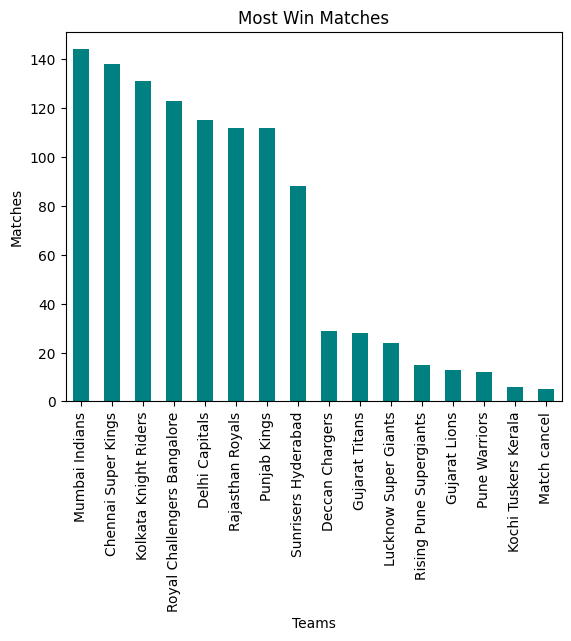

In [71]:
most_win = df['winner'].value_counts()
most_win.plot(kind="bar", color="teal")
plt.title("Most Win Matches")
plt.xlabel("Teams")
plt.ylabel("Matches")
plt.show()

# insight

- Mumbai Indians win highest matches and CSk is the second most win matches

# Which team has played the most finals or qualified frequently?

In [72]:
most_qualified = df[df['match_type'].str.lower().isin(['final','semi final'])]
most_qualified_teams = pd.concat([most_qualified['team1'], most_qualified['team2']]).value_counts().sort_values(ascending=False)
most_qualified_teams

,count
Chennai Super Kings,13
Mumbai Indians,7
Royal Challengers Bangalore,5
Kolkata Knight Riders,4
Delhi Capitals,3
Sunrisers Hyderabad,3
Rajasthan Royals,3
Deccan Chargers,3
Gujarat Titans,2
Punjab Kings,2


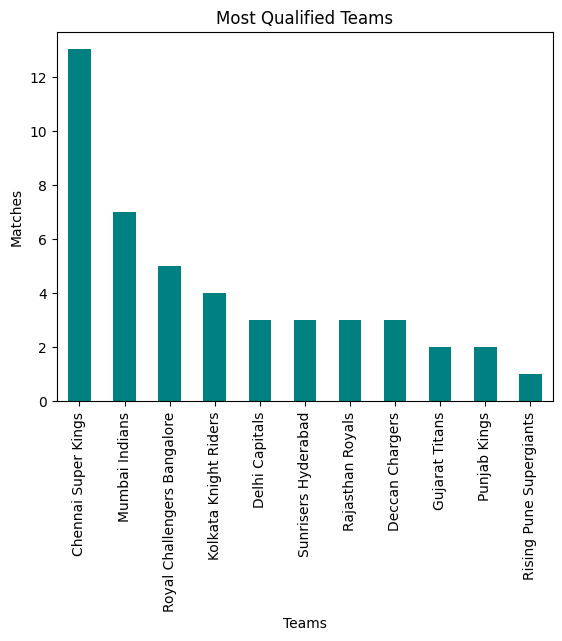

In [73]:
# ploting bar chart for
most_qualified_teams.plot(kind="bar", color="teal")
plt.title("Most Qualified Teams")
plt.xlabel("Teams")
plt.ylabel("Matches")
plt.show()

# insight

- CSK is most qualified team because csk played most finals and semi finals

# Season-wise top Player of the Match winners

In [74]:
top_season_players = df.groupby(['season', 'player_of_match']).size().reset_index(name='count')
top_season_players = top_season_players.loc[top_season_players.groupby('season')['count'].idxmax()]
print(top_season_players)

     season  player_of_match  count
28     2008         SE Marsh      5
80     2009        YK Pathan      3
121    2010     SR Tendulkar      4
133    2011         CH Gayle      6
189    2012         CH Gayle      5
254    2013       MEK Hussey      5
286    2014       GJ Maxwell      4
320    2015        DA Warner      4
388    2016          V Kohli      5
394    2017        BA Stokes      3
464    2018      Rashid Khan      4
477    2019       AD Russell      4
518    2020   AB de Villiers      3
595    2021       RD Gaikwad      4
625    2022    Kuldeep Yadav      4
706    2023     Shubman Gill      4
713    2024  Abhishek Sharma      3


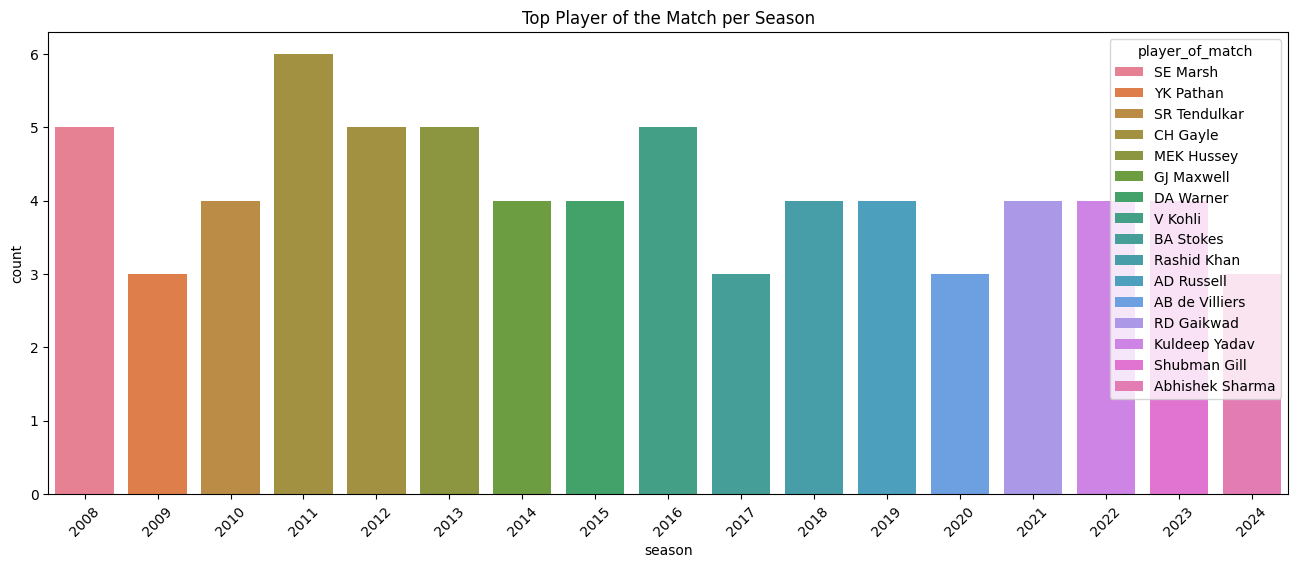

In [75]:

top_season_players = df.groupby(['season', 'player_of_match']).size().reset_index(name='count')
top_season_players = top_season_players.loc[top_season_players.groupby('season')['count'].idxmax()]
plt.figure(figsize=(16,6))
sns.barplot(x='season', y='count', hue='player_of_match', data=top_season_players)
plt.title("Top Player of the Match per Season")
plt.xticks(rotation=45)
plt.show()

# insight

season wise most player of the match winners

# Close Matches: How many matches were closely contested?

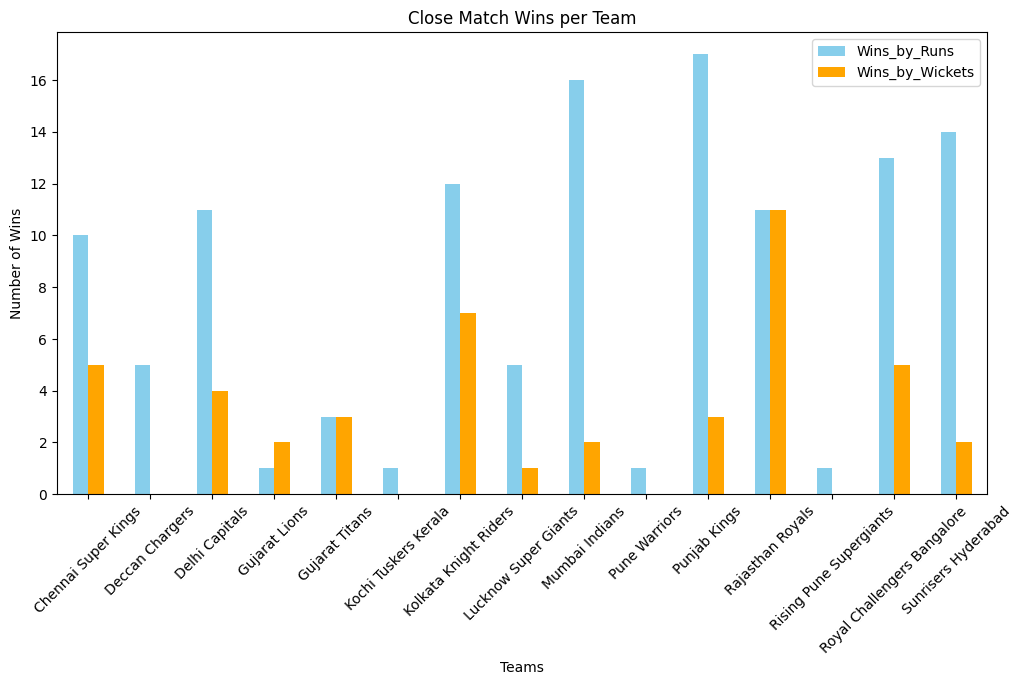

In [76]:

# Filter close matches
close_runs = df[(df['result_margin'] <= 10) & (df['result'] == 'runs')]
close_wickets = df[(df['result_margin'] <= 3) & (df['result'] == 'wickets')]

# Count wins per team
wins_by_runs = close_runs['winner'].value_counts()
wins_by_wickets = close_wickets['winner'].value_counts()

# Combine into a single DataFrame
close_stats = pd.DataFrame({
    'Wins_by_Runs': wins_by_runs,
    'Wins_by_Wickets': wins_by_wickets
}).fillna(0)  # Fill NaN with 0

# Plot bar chart
close_stats.plot(kind='bar', figsize=(12,6), color=['skyblue','orange'])
plt.title('Close Match Wins per Team')
plt.ylabel('Number of Wins')
plt.xlabel('Teams')
plt.xticks(rotation=45)
plt.show()


#insight

in the ipl history how much matches goes close to loose or win by runs and the wickets remain the blue colour of chart shows win by runs and orange is shows win by wicktes

# top 10 most player of the match winner

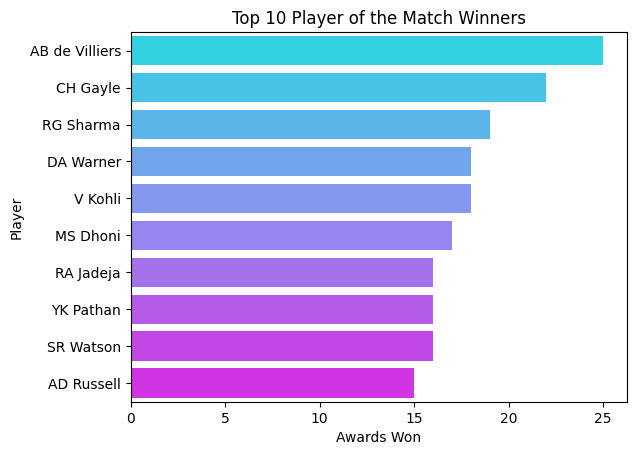

In [77]:
top_players = df['player_of_match'].value_counts().head(10)
sns.barplot(y=top_players.index, x=top_players.values, palette='cool')
plt.title("Top 10 Player of the Match Winners")
plt.xlabel("Awards Won")
plt.ylabel("Player")
plt.show()


# insight

most player of the match  award winner players and AB de villiers is the most player of the match award and CH gayle is second most award winner

# Matches Resulted by Method (like DLS or No Result)

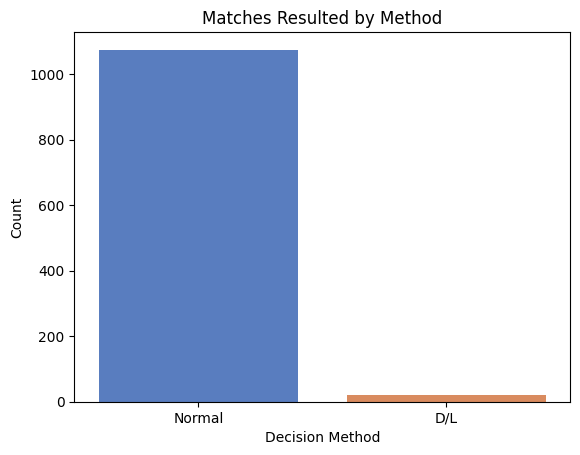

In [78]:
# Matches Resulted by Method (like DLS or No Result)
sns.countplot(x='method', data=df, palette='muted')
plt.title("Matches Resulted by Method")
plt.xlabel("Decision Method")
plt.ylabel("Count")
plt.show()


#insight

this graph shows in the ipl history most of the matches are normal some are no result and D/L method

# Matches played per season

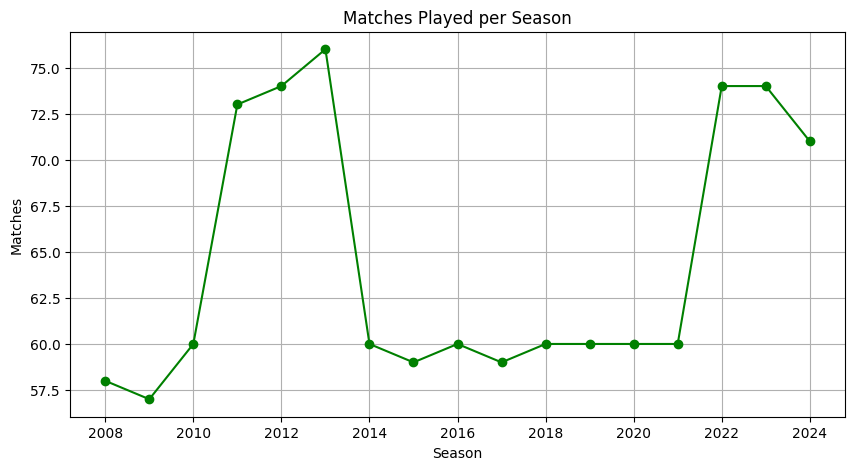

In [79]:

season_counts = df['season'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(season_counts.index, season_counts.values, marker='o', color='green')
plt.title("Matches Played per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.grid(True)
plt.show()


#insight

The number of matches increased significantly after 2011, showing IPL expansion. A sharp rise in 2022 reflects the addition of new teams.

#  Toss Decision (Bat/Field)

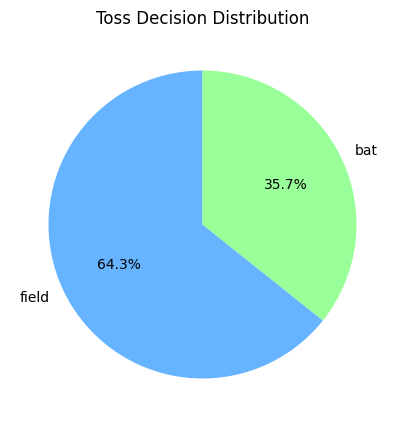

In [80]:

toss_decision = df['toss_decision'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(toss_decision, labels=toss_decision.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title("Toss Decision Distribution")
plt.show()


#insight

in this the team win and choose bat first or ball first. most of the team won the toss and choose to field

#Season-wise Top Team Wins

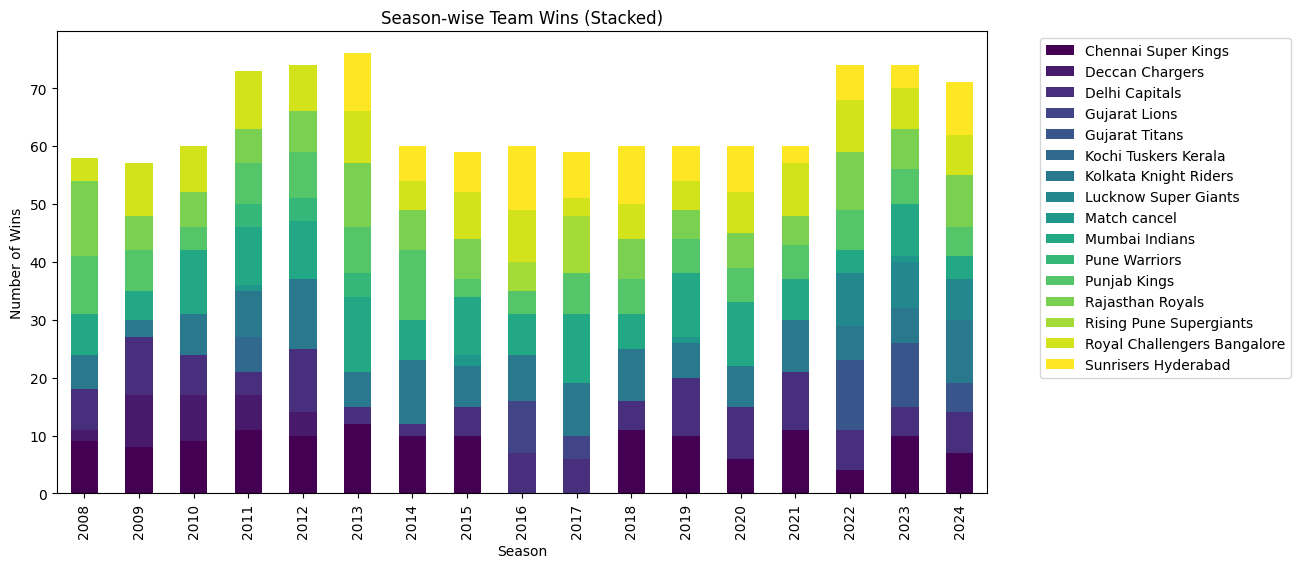

In [81]:
#Stacked Bar Chart
season_team = df.groupby(['season', 'winner']).size().unstack(fill_value=0)
season_team.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Season-wise Team Wins (Stacked)")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# insight

this chart show us which team has won hight number of machtes

# Super Over Occurrence

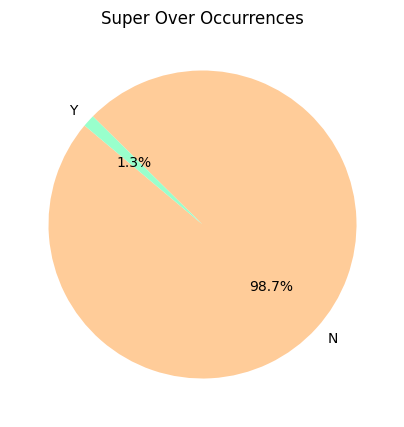

In [82]:
#  Pie Chart
so = df['super_over'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(so, labels=so.index, autopct='%1.1f%%', startangle=140, colors=['#ffcc99','#99ffcc'])
plt.title("Super Over Occurrences")
plt.show()


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   city             1095 non-null   object        
 2   date             1095 non-null   datetime64[ns]
 3   match_type       1095 non-null   object        
 4   player_of_match  1095 non-null   object        
 5   venue            1095 non-null   object        
 6   team1            1095 non-null   object        
 7   team2            1095 non-null   object        
 8   toss_winner      1095 non-null   object        
 9   toss_decision    1095 non-null   object        
 10  winner           1095 non-null   object        
 11  result           1095 non-null   object        
 12  result_margin    1095 non-null   float64       
 13  target_runs      1095 non-null   float64       
 14  target_overs     1095 non-null   float64

# insight

in the ipl history only 1.3% match winner decided in super over. super over means the score is tie and the team playes one over again match to decide the winner

# Most Frequent Venues. which venue host most matches

<Axes: xlabel='venue'>

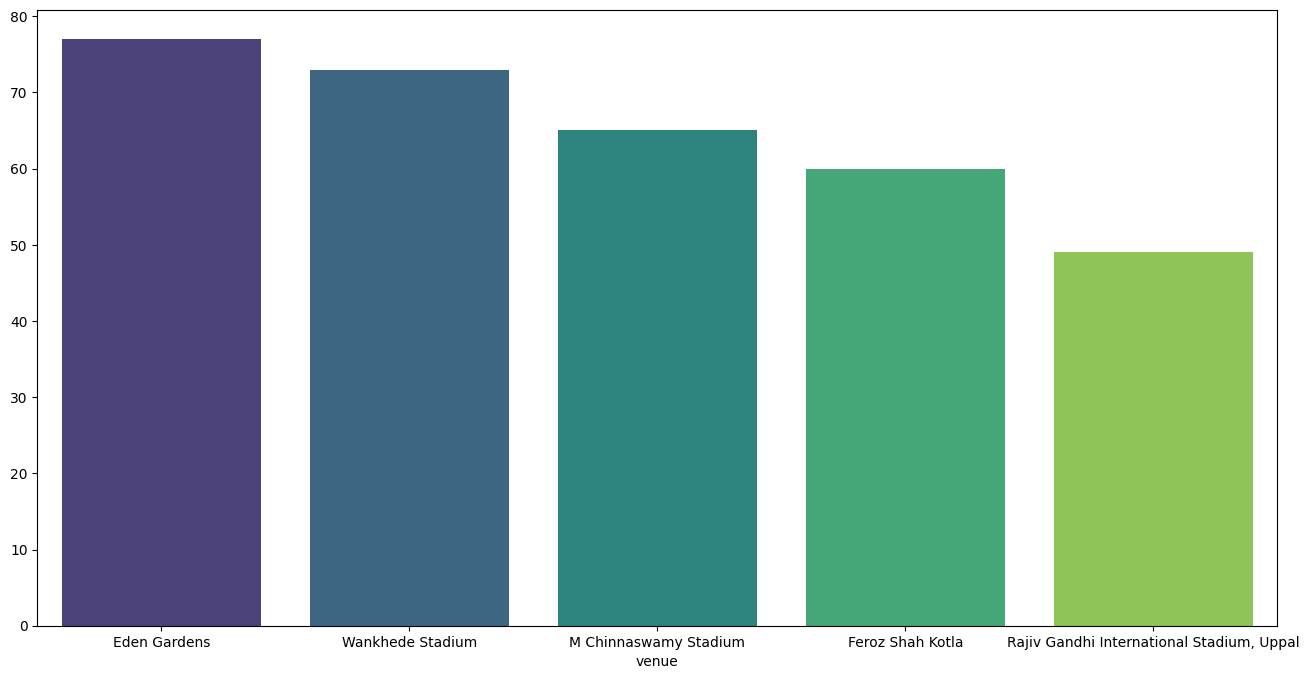

In [84]:

venue_counts = df['venue'].value_counts().head(5)
plt.figure(figsize=(16,8))
sns.barplot(x=venue_counts.index, y=venue_counts.values, palette='viridis')

# insight

Eden Gardens is the most frequently used venue in IPL history, followed by Wankhede Stadium, indicating their importance as major hosting locations.

## Conclusion

In this project, I explored, cleaned, and analyzed the IPL dataset to identify meaningful patterns and insights. I used various data analysis and visualization techniques to understand the data and present the results clearly. Through this project, I improved my skills in Python, data analysis, and visualization using libraries such as Pandas, Matplotlib, and Seaborn. This project helped me understand how data can be used to support better decision-making and solve real-world business problems.


## Final Outcome Summary

- The analysis helps teams and analysts understand winning patterns and strategic trends.  
- Broadcasters and advertisers can identify popular venues and teams for promotions.  
- Coaches can make data-driven decisions for team selection and match strategies.  
- Data learners gain practical experience in data cleaning, visualization, and exploratory data analysis using Python.
